# Apply Politization Tracker
Testing that the tracker works for both # of incidences and incidence rates.

In [1]:
# import required modules and set up environment
import os

# replace file path below with your own local convokit
os.chdir('/Users/marianneaubin/Documents/Classes/CS6742/cs6742-fork')

import convokit

from convokit import Corpus, Parser, PolTracker, Transformer
import nltk

In [2]:
# load corpus, this takes a long time so you can also use a different corpus as a test
corpus = convokit.Corpus(filename='../politics-filtered-corpus')
#corpus = convokit.Corpus(filename=convokit.download("iq2-corpus"))

In [3]:
corpus.print_summary_stats()

Number of Users: 289890
Number of Utterances: 3237456
Number of Conversations: 94768


In [4]:
pt = PolTracker();
corpus = pt.transform(corpus)

In [5]:
counter = 1
for conv_id in corpus.conversations:
    conv = corpus.get_conversation(conv_id)
    for utt in conv.iter_utterances():
        if utt.meta["num_pol_refs"] != 0:
            print(utt.meta["num_pol_refs"])
            print(utt.meta["pol_words"])
            print(utt.meta["num_pol_refs_incidence"])
            counter = counter + 1
        if (counter % 10) == 0:
            break;
    if (counter % 100) == 0:
            break;

1
['trump']
0.08333333333333333
1
['trump']
0.011494252873563218
2
['trump', 'trump']
0.03333333333333333
1
['trump']
0.02702702702702703
1
['trump']
0.023255813953488372
1
['trump']
0.011764705882352941
1
['trump']
0.025
1
['media']
0.037037037037037035
2
['media', 'media']
0.03225806451612903
1
['politics']
0.008403361344537815
1
['politics']
0.008264462809917356
2
['terrorism', 'terrorism']
0.04081632653061224
1
['politics']
0.02040816326530612
1
['politics']
0.04
1
['nation']
0.011111111111111112
1
['trump']
0.047619047619047616
1
['trump']
0.03571428571428571
1
['trump']
0.05
2
['trump', 'trump']
0.0111731843575419
1
['politics']
0.011764705882352941
1
['state']
0.008333333333333333
1
['politics']
0.00546448087431694
5
['independent', 'government', 'precedent', 'politics', 'citizen']
0.02403846153846154
1
['harris']
0.010752688172043012
3
['jurisdiction', 'government', 'jurisdiction']
0.007425742574257425
7
['opinion', 'democracy', 'politics', 'gerrymandering', 'gerrymandering', '

In [8]:
utter_ids = corpus.get_utterance_ids()

'3v4rga'

In [9]:
utter_ids[7000]

'4o0zck'

In [39]:
pol_word_counter = 0
total_word_counter = 0
counter = 0
for x in range(0,3237456):
    utt = corpus.get_utterance(utter_ids[x])
    pol_word_counter = pol_word_counter + utt.meta['num_pol_refs']
    total_word_counter = total_word_counter + utt.meta['num_pol_refs_incidence']
    counter = counter + 1
    if counter % 100000 == 0:
        print(counter, " completed")
    
print("total # of words:", pol_word_counter)
print(total_word_counter)

100000  completed
200000  completed
300000  completed
400000  completed
500000  completed
600000  completed
700000  completed
800000  completed
900000  completed
1000000  completed
1100000  completed
1200000  completed
1300000  completed
1400000  completed
1500000  completed
1600000  completed
1700000  completed
1800000  completed
1900000  completed
2000000  completed
2100000  completed
2200000  completed
2300000  completed
2400000  completed
2500000  completed
2600000  completed
2700000  completed
2800000  completed
2900000  completed
3000000  completed
3100000  completed
3200000  completed
total # of words: 1124222
24957.98849078706


In [47]:
counter = 0
pol_words = {}
for x in range(0, 3237456):
    utt = corpus.get_utterance(utter_ids[x])
    utt_pol_words = utt.meta['pol_words']
    for y in utt_pol_words:
        if (y not in pol_words.keys()):
            pol_words[y] = 1
        else:
            pol_words[y] = pol_words[y] + 1
    counter = counter + 1
    if counter % 100000 == 0:
        print(counter, " completed")
        
print(pol_words)

100000  completed
200000  completed
300000  completed
400000  completed
500000  completed
600000  completed
700000  completed
800000  completed
900000  completed
1000000  completed
1100000  completed
1200000  completed
1300000  completed
1400000  completed
1500000  completed
1600000  completed
1700000  completed
1800000  completed
1900000  completed
2000000  completed
2100000  completed
2200000  completed
2300000  completed
2400000  completed
2500000  completed
2600000  completed
2700000  completed
2800000  completed
2900000  completed
3000000  completed
3100000  completed
3200000  completed
{'politics': 38850, 'bush': 20633, 'power': 50312, 'trump': 350441, 'clinton': 59853, 'state': 85150, 'democracy': 16174, 'amendment': 43074, 'government': 113380, 'reverse': 2050, 'oversight': 2384, 'authority': 7008, 'unemployment': 3810, 'johnson': 4968, 'revolution': 5800, 'liberty': 5539, 'terrorism': 17979, 'constitution': 26416, 'media': 52720, 'harris': 1309, 'nation': 21012, 'opinion': 294

In [88]:
freqs = []
large_pol_words = []
for x in pol_words.keys():
    if pol_words[x] > 5000:
        freqs.append(pol_words[x])
        large_pol_words.append(x)
        
freqs, large_pol_words = (list(x) for x in zip(*sorted(zip(freqs, large_pol_words))))
freqs.reverse()
large_pol_words.reverse()
print(freqs)

[350441, 113380, 85150, 59853, 52720, 50312, 43074, 38850, 29490, 26416, 21012, 20633, 17979, 16174, 12897, 9209, 7704, 7496, 7008, 6066, 5851, 5800, 5539, 5391]


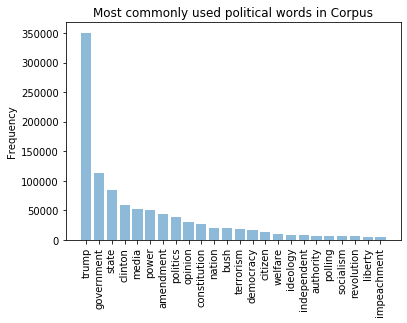

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

objects = large_pol_words
y_pos = np.arange(len(objects))

plt.bar(y_pos, freqs, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Frequency')
plt.title('Most commonly used political words in Corpus')

plt.show()

## ISSUE: right now, this only works for single words. 
## will need to change the transformer so that it can also
## compute multiple words e.g. "bill of rights"

In [286]:
## read in csv of relevant utts for sandy hook

import csv
#with open('../sandyhook_utterance_ids.csv', 'r') as f:
with open('../auroratheater_utterance_ids.csv', 'r') as f:
    reader = csv.reader(f)
    sh_list = list(reader)


In [287]:
## recompute political freqs

pol_words_sh = {}
for x in sh_list:
    utt = corpus.get_utterance(x[0])
    utt_pol_words = utt.meta['pol_words']
    for y in utt_pol_words:
        if (y not in pol_words_sh.keys()):
            pol_words_sh[y] = 1
        else:
            pol_words_sh[y] = pol_words_sh[y] + 1
        
print(pol_words_sh)

{'state': 3, 'authority': 3, 'welfare': 1, 'power': 1, 'nation': 1, 'bureaucracy': 1, 'unemployment': 1, 'socialism': 1}


In [288]:
freqs_sh = []
large_pol_words_sh = []
for x in pol_words_sh.keys():
    freqs_sh.append(pol_words_sh[x])
    large_pol_words_sh.append(x)
        
freqs_sh, large_pol_words_sh = (list(x) for x in zip(*sorted(zip(freqs_sh, large_pol_words_sh))))
freqs_sh.reverse()
large_pol_words_sh.reverse()
print(freqs_sh)

[3, 3, 1, 1, 1, 1, 1, 1]


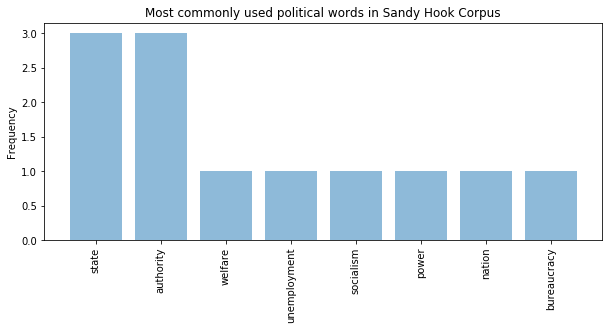

In [289]:
objects = large_pol_words_sh
y_pos = np.arange(len(objects))

plt.figure(figsize=(10,4))
plt.bar(y_pos, freqs_sh, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Frequency')
plt.title('Most commonly used political words in Sandy Hook Corpus')

plt.show()

In [155]:
print(corpus.get_utterance(utter_ids[60]))

Utterance({'id': '3v4rga', 'user': User([('name', 'aluminumdisc')]), 'root': '3v4rga', 'reply_to': None, 'timestamp': 1449056876, 'text': '', 'meta': {'score': 2, 'top_level_comment': None, 'retrieved_on': 1454888391, 'gilded': 0, 'gildings': None, 'subreddit': 'politics', 'stickied': False, 'permalink': '/r/politics/comments/3v4rga/marco_rubio_in_second_place_in_latest_national/', 'author_flair_text': '', 'num_pol_refs': 0, 'num_pol_refs_incidence': 0, 'pol_words': []}})


## Sandy Hook analysis
Now we try to establish a time series of how many words there are per day after December 14, 2012 (Sandy Hook shooting day). Timestamp: 1355461200

In [292]:
from datetime import datetime
import pandas as pd 

ps = 7

#Sandy hook dates
#start_date = '2012-12-14'
#end_date = '2012-12-22'
start_date = '2012-07-20'
end_date = '2012-07-28'

num_posts_sh = [0] * ps
times = pd.date_range(start=start_date,end=end_date,periods=ps+1)
times = np.array(times)
bin_times = times[:-1]

# convert to datetime object
times_temp = []
for i,x in enumerate(times):
    times_temp.append(pd.to_datetime(x))
times = times_temp    

for i,x in enumerate(sh_list):
    utt = corpus.get_utterance(x[0])
    posted_time = datetime.fromtimestamp(utt.timestamp)
    y = 0
    while (posted_time > times[y]):
        y = y + 1
    ## this gives us the timeframe to mark it as
    num_posts_sh[y-1] = num_posts_sh[y-1] + 1
print(num_posts_sh)

[7, 7, 0, 85, 2, 10, 0]


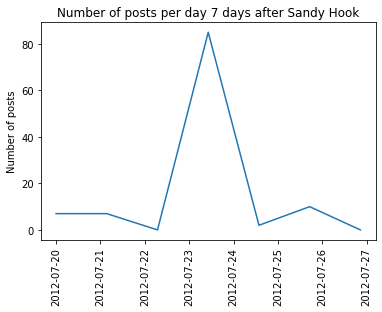

In [297]:
plt.plot(bin_times,num_posts_sh)
plt.xticks(rotation='vertical')
plt.ylabel('Number of posts')
plt.title('Number of posts per day 7 days after Sandy Hook')
plt.show()

In [298]:
from nltk.tokenize import word_tokenize

## function takes in utterance and counts total words
def count_total_words(utt):
    if utt.text != None:
        tokenized = word_tokenize(utt.text.lower())
        return len(tokenized)

In [299]:
##check above function works as expected
print(count_total_words(corpus.get_utterance(utter_ids[400080])))
print(corpus.get_utterance(utter_ids[400080]))

258
Utterance({'id': 'c7hyvbw', 'user': User([('name', '[deleted]')]), 'root': '14zqr7', 'reply_to': 'c7hyq49', 'timestamp': 1355758259, 'text': "Again, see how that goes when you shoot a cop.  I'm sure people will sympathize with you...But really, you're making a point that has no basis in reality...the cops aren't going to fucking break into your home for no reason to take your shit.\n\nI'm not misunderstanding, I just don't believe you have any freedom to own a firearm.  It's not a right.  Maybe it's a privilege, but it's certainly not a right.  (and don't say anything about the second amendment...that's a bullshit excuse....commodities aren't things that should be protected by the bill of rights)\n\nI didn't flip.  In the first response, you said he was wrong in the association.  I said he was stating a fact: that historically, guns have been used to deny people freedom in this country, probably more than they have been used to give freedom.  \n\nI said the gun culture of the south

In [300]:
## next, I want the incidence rate per day of political words

inc_rate_sh = [0]*ps
total_pol_words_sh = [0]*ps
total_words_sh = [0]*ps

for i,x in enumerate(sh_list):
    utt = corpus.get_utterance(x[0])
    posted_time = datetime.fromtimestamp(utt.timestamp)
    y = 0
    while (posted_time > times[y]):
        
        y = y + 1
               
    ## this gives us the timeframe to mark it as
    total_pol_words_sh[y-1] = total_pol_words_sh[y-1] + utt.meta['num_pol_refs']
    total_words_sh[y-1] = total_words_sh[y-1] + count_total_words(utt)
    if y == 0:
        print(count_total_words(utt))

print(total_pol_words_sh)
print(total_words_sh)

for i in range(0, ps):
    if total_words_sh[i] != 0:
        inc_rate_sh[i] = total_pol_words_sh[i]/total_words_sh[i]
    
print(inc_rate_sh)

[0, 0, 0, 9, 0, 3, 0]
[284, 266, 0, 4814, 24, 331, 0]
[0.0, 0.0, 0, 0.0018695471541337765, 0.0, 0.00906344410876133, 0]


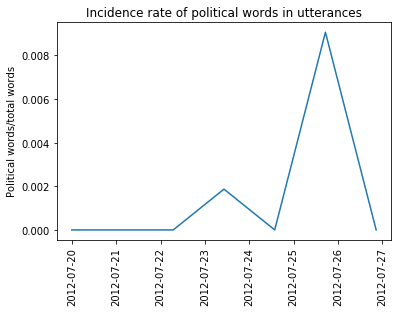

In [301]:
plt.plot(bin_times,inc_rate_sh)
plt.xticks(rotation='vertical')
plt.ylabel('Political words/total words')
plt.title('Incidence rate of political words in utterances')
plt.show()